<a href="https://githubtocolab.com/giswqs/geemap/blob/master/examples/notebooks/35_geemap_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df = [df_train, df_test]

df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,<=7jt
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,<=7jt
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,>7jt
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,<=7jt
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,>7jt


In [ ]:
df_train = df_train.replace({
    '?': np.nan,
    '<=7jt': 0,
    '>7jt': 1
    })
df_test = df_test.replace('?', np.nan)
df = [df_train, df_test]

In [ ]:
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,0
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,0
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,1
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,0
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,1


In [ ]:
df_train.info()
print("\n\n")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35994 entries, 0 to 35993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35994 non-null  int64  
 1   Umur                   35994 non-null  int64  
 2   Kelas Pekerja          33931 non-null  object 
 3   Berat Akhir            35994 non-null  int64  
 4   Pendidikan             35994 non-null  object 
 5   Jmlh Tahun Pendidikan  35994 non-null  int64  
 6   Status Perkawinan      35994 non-null  object 
 7   Pekerjaan              33925 non-null  object 
 8   Jenis Kelamin          35994 non-null  object 
 9   Keuntungan Kapital     35994 non-null  float64
 10  Kerugian Capital       35994 non-null  float64
 11  Jam per Minggu         35994 non-null  float64
 12  Gaji                   35994 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 3.6+ MB



<class 'pandas.core.frame.DataFrame'>
RangeInd

In [ ]:
df_train.describe()

,id,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
count,35994.000000,35994.000000,3.599400e+04,35994.000000,3.599400e+04,3.599400e+04,35994.000000,35994.000000
mean,17996.500000,38.664555,1.899318e+05,10.079874,1.503923e+07,1.217974e+06,40.435656,0.239762
std,10390.717131,13.676266,1.058023e+05,2.574813,1.029919e+08,5.631544e+06,12.367552,0.426944
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,8998.250000,28.000000,1.177670e+05,9.000000,0.000000e+00,0.000000e+00,40.000000,0.000000
50%,17996.500000,37.000000,1.784665e+05,10.000000,0.000000e+00,0.000000e+00,40.000000,0.000000
75%,26994.750000,48.000000,2.379185e+05,12.000000,0.000000e+00,0.000000e+00,45.000000,0.000000
max,35993.000000,90.000000,1.490400e+06,16.000000,1.399986e+09,6.098400e+07,99.000000,1.000000


In [ ]:
# Analyze Data
# 'Kelas Pekerja' and 'Gaji'
df_train.groupby('Kelas Pekerja')[['Gaji']].mean()

,Gaji
Kelas Pekerja,
Pekerja Bebas Bukan Perusahan,0.275297
Pekerja Bebas Perusahaan,0.556167
Pemerintah Lokal,0.296930
Pemerintah Negara,0.276913
Pemerintah Provinsi,0.402439
Tanpa di Bayar,0.066667
Tidak Pernah Bekerja,0.000000
Wiraswasta,0.217252


In [ ]:
# 'Pendidikan' and 'Gaji'
df_train.groupby('Pendidikan')[['Gaji']].mean()

,Gaji
Pendidikan,
10th,0.066406
11th,0.051711
12th,0.073222
1st-4th,0.038043
5th-6th,0.054124
7th-8th,0.067449
9th,0.064912
D3,0.260426
D4,0.260667


In [ ]:
# 'Status' and 'Gaji'
df_train.groupby('Status Perkawinan')[['Gaji']].mean()

,Gaji
Status Perkawinan,
Belum Pernah Menikah,0.045481
Berpisah,0.072374
Cerai,0.101503
Janda,0.079782
Menikah,0.445136
Menikah LDR,0.116090


In [ ]:
# 'Pekerjaan' and 'Gaji'
df_train.groupby('Pekerjaan')[['Gaji']].mean()

,Gaji
Pekerjaan,
Asisten Rumah Tangga,0.016043
Ekesekutif Managerial,0.477126
Mesin Inspeksi,0.130222
Pembersih,0.063636
Pemuka Agama,0.145022
Penjaga,0.307580
Perbaikan Kerajinan,0.221433
Petani,0.112454
Sales,0.269782


In [ ]:
# 'Jenis Kelamin' and 'Gaji'
df_train.groupby('Jenis Kelamin')[['Gaji']].mean()

,Gaji
Jenis Kelamin,
Laki2,0.302814
Perempuan,0.112101


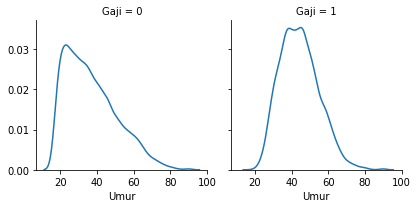

In [ ]:
# Visualizing Data
# 'Umur' and 'Gaji'
grid = sns.FacetGrid(df_train, col='Gaji')
grid.map(sns.kdeplot, 'Umur')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


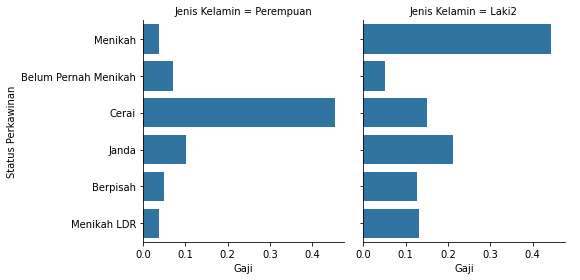

In [ ]:
# 'Jenis Kelamin', 'Status Perkawinan', and 'Gaji'
grid = sns.FacetGrid(df_train, col='Jenis Kelamin', height=4)
grid.map(sns.barplot, 'Gaji', 'Status Perkawinan', ci=None)
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


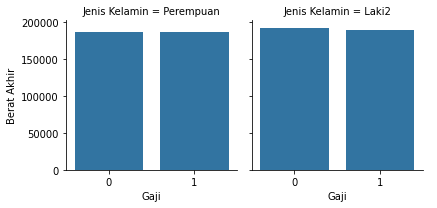

In [ ]:
grid = sns.FacetGrid(df_train, col='Jenis Kelamin')
grid.map(sns.barplot, 'Gaji', 'Berat Akhir', ci=None)
grid.add_legend();

In [ ]:
# Data Processing
# Handle Missing Value in 'Kelas Pekerja'
df_train['Kelas Pekerja'].value_counts()

Wiraswasta                       24948
Pekerja Bebas Bukan Perusahan     2866
Pemerintah Lokal                  2280
Pemerintah Negara                 1477
Pekerja Bebas Perusahaan          1273
Pemerintah Provinsi               1066
Tanpa di Bayar                      15
Tidak Pernah Bekerja                 6
Name: Kelas Pekerja, dtype: int64

In [ ]:
for dataset in df:
  dataset['Kelas Pekerja'] = dataset['Kelas Pekerja'].fillna('Wiraswasta')

In [ ]:
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,0
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,0
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,1
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,0
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,1


In [ ]:
# Handle Missing Value in 'Pekerjaan'
df_train['Pekerjaan'].value_counts()

Spesialis                4587
Perbaikan Kerajinan      4507
Ekesekutif Managerial    4481
Pemuka Agama             4158
Sales                    4044
Servis Lainnya           3615
Mesin Inspeksi           2250
Supir                    1741
Pembersih                1540
Petani                   1076
Tech-support             1042
Penjaga                   686
Asisten Rumah Tangga      187
Tentara                    11
Name: Pekerjaan, dtype: int64

In [ ]:
for dataset in df:
  dataset['Pekerjaan'] = dataset['Pekerjaan'].fillna('Spesialis')

In [ ]:
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,0
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,0
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,1
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,0
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,1


In [ ]:
# Convert 'Kelas Pekerja'
conv_kerja = {
    'Pemerintah Negara': 0,
    'Pemerintah Provinsi': 1,
    'Pemerintah Lokal': 2,
    'Pekerja Bebas Perusahaan': 3,
    'Pekerja Bebas Bukan Perusahan': 4,
    'Wiraswasta': 5,
    'Tidak Pernah Bekerja': 6,
    'Tanpa di Bayar': 7
}

for dataset in df:
  dataset['Kelas Pekerja'] = dataset['Kelas Pekerja'].map(conv_kerja)

In [ ]:
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,5,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,0
1,1,49,5,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,0
2,2,44,5,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,1
3,3,24,5,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,0
4,4,33,5,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,1


In [ ]:
# Convert 'Pendidikan'
for dataset in df:
  dataset['Pendidikan'] = dataset['Pendidikan'].replace(['1st-4th', '5th-6th'], 'SD')
  dataset['Pendidikan'] = dataset['Pendidikan'].replace(['7th-8th', '9th'], 'SMP')
  dataset['Pendidikan'] = dataset['Pendidikan'].replace(['10th', '11th', '12th'], 'SMA')
  dataset['Pendidikan'] = dataset['Pendidikan'].replace(['Sarjana', 'D4'], 'D4/Sarjana')
  dataset['Pendidikan'] = dataset['Pendidikan'].replace('Sekolah Professional', 'Pendidikan Tinggi')

df_train.groupby('Pendidikan')[['Gaji']].mean()

,Gaji
Pendidikan,
D3,0.260426
D4/Sarjana,0.383818
Doktor,0.731707
Master,0.542695
Pendidikan Tinggi,0.227657
SD,0.045741
SMA,0.138921
SMP,0.066294


In [ ]:
conv_didik = {
    'SD': 0,
    'SMP': 1,
    'SMA': 2,
    'D3': 3,
    'D4/Sarjana': 4,
    'Master': 5,
    'Doktor': 6,
    'Pendidikan Tinggi': 7
}

for dataset in df:
  dataset['Pendidikan'] = dataset['Pendidikan'].map(conv_didik)

In [ ]:
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,5,242912,2,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,0
1,1,49,5,140782,2,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,0
2,2,44,5,120057,3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,1
3,3,24,5,194630,4,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,0
4,4,33,5,219619,5,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,1


In [ ]:
df_train.groupby('Status Perkawinan')[['Gaji']].mean()

,Gaji
Status Perkawinan,
Belum Pernah Menikah,0.045481
Berpisah,0.072374
Cerai,0.101503
Janda,0.079782
Menikah,0.445136
Menikah LDR,0.116090


In [ ]:
# Convert 'Status Perkawinan'
for dataset in df:
  dataset['Status Perkawinan'] = dataset['Status Perkawinan'].replace(['Belum Pernah Menikah', 'Berpisah', 'Cerai', 'Janda'], 'Tidak Menikah')
  dataset['Status Perkawinan'] = dataset['Status Perkawinan'].replace('Menikah LDR', 'Menikah')

df_train.groupby('Status Perkawinan')[['Gaji']].mean()

,Gaji
Status Perkawinan,
Menikah,0.43566
Tidak Menikah,0.06345


In [ ]:
for dataset in df:
  dataset['Status Perkawinan'] = dataset['Status Perkawinan'].map({
      'Tidak Menikah': 0,
      'Menikah': 1
  })

In [ ]:
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,5,242912,2,9,0,Servis Lainnya,Perempuan,0.0,0.0,35.0,0
1,1,49,5,140782,2,6,0,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,0
2,2,44,5,120057,3,12,1,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,1
3,3,24,5,194630,4,13,0,Spesialis,Laki2,0.0,0.0,35.0,0
4,4,33,5,219619,5,14,1,Spesialis,Laki2,210336000.0,0.0,40.0,1


In [ ]:
# Convert 'Pekerjaan'
conv_kerja = {
    'Asisten Rumah Tangga': 0,
    'Ekesekutif Managerial': 1,
    'Mesin Inspeksi': 2,
    'Pembersih': 3,
    'Pemuka Agama': 4,
    'Penjaga': 5,
    'Perbaikan Kerajinan': 6,
    'Petani': 7,
    'Sales': 8,
    'Servis Lainnya': 9,
    'Spesialis': 10,
    'Supir': 11,
    'Tech-support': 12,
    'Tentara': 13,
}

for dataset in df:
  dataset['Pekerjaan'] = dataset['Pekerjaan'].map(conv_kerja)

In [ ]:
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,5,242912,2,9,0,9,Perempuan,0.0,0.0,35.0,0
1,1,49,5,140782,2,6,0,1,Perempuan,0.0,0.0,40.0,0
2,2,44,5,120057,3,12,1,1,Laki2,61404000.0,0.0,45.0,1
3,3,24,5,194630,4,13,0,10,Laki2,0.0,0.0,35.0,0
4,4,33,5,219619,5,14,1,10,Laki2,210336000.0,0.0,40.0,1


In [ ]:
# Convert 'Jenis Kelamin'
for dataset in df:
  dataset['Jenis Kelamin'] = dataset['Jenis Kelamin'].map({
      'Perempuan': 0,
      'Laki2': 1
  })

In [ ]:
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,5,242912,2,9,0,9,0,0.0,0.0,35.0,0
1,1,49,5,140782,2,6,0,1,0,0.0,0.0,40.0,0
2,2,44,5,120057,3,12,1,1,1,61404000.0,0.0,45.0,1
3,3,24,5,194630,4,13,0,10,1,0.0,0.0,35.0,0
4,4,33,5,219619,5,14,1,10,1,210336000.0,0.0,40.0,1


In [ ]:
# There are too many zero values in 'Kerugian Capital' and 'Keuntungan Capital'
# There are no correlation 'Jumlah Tahun Pendidikan' with 'Gaji'
df_train = df_train.drop(['Kerugian Capital', 'Keuntungan Kapital', 'Jmlh Tahun Pendidikan'], axis=1)
df_test = df_test.drop(['Kerugian Capital', 'Keuntungan Kapital', 'Jmlh Tahun Pendidikan'], axis=1)
df = [df_train, df_test]

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35994 entries, 0 to 35993
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 35994 non-null  int64  
 1   Umur               35994 non-null  int64  
 2   Kelas Pekerja      35994 non-null  int64  
 3   Berat Akhir        35994 non-null  int64  
 4   Pendidikan         35994 non-null  int64  
 5   Status Perkawinan  35994 non-null  int64  
 6   Pekerjaan          35994 non-null  int64  
 7   Jenis Kelamin      35994 non-null  int64  
 8   Jam per Minggu     35994 non-null  float64
 9   Gaji               35994 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 2.7 MB


In [ ]:
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Jam per Minggu,Gaji
0,0,21,5,242912,2,0,9,0,35.0,0
1,1,49,5,140782,2,0,1,0,40.0,0
2,2,44,5,120057,3,1,1,1,45.0,1
3,3,24,5,194630,4,0,10,1,35.0,0
4,4,33,5,219619,5,1,10,1,40.0,1


In [ ]:
# Modeling
X = df_train.drop(['id', 'Gaji'], axis=1)
y = df_train['Gaji']
# X_test = df_test.drop(['id'], axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)



---



---



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=151, criterion='entropy', random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=151,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting with Test Data
y_test_pred = model.predict(X_test)
y_test_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# Scoring
eval = roc_auc_score(y_test, y_test_pred)
eval

0.7314627755468274



---



---



---



In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predicting with Test Data
y_test_pred = model.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Scoring
eval = roc_auc_score(y_test, y_test_pred)
eval

0.5



---



---



---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predicting with Test Data
y_test_pred = model.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Scoring
eval = roc_auc_score(y_test, y_test_pred)
eval

0.5464510387980688



---



---



---



In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Predicting with Test Data
y_test_pred = model.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Scoring
eval = roc_auc_score(y_test, y_test_pred)
eval

0.6848205527651916



---



---



---



In [ ]:
# Predicting with New Data
X_pred = df_test.drop(['id'], axis=1).copy()

y_pred = model.predict(X_pred)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
result = pd.DataFrame({
    'id': df_test['id'],
    'Gaji': y_pred
})

result

,id,Gaji
0,35994,0
1,35995,0
2,35996,1
3,35997,1
4,35998,0
...,...,...
9594,45588,0
9595,45589,1
9596,45590,0
9597,45591,0


In [ ]:
result.to_csv('submission_gaji1.csv', index=False)